# CNN 신경망을 이용한 이미지 분류 문제
 1. 사용할 신경망은 AlexNet을 이용하여 모델 구성 및 구현 작업을 진행
 2. Dataset은 다음의 주소에서 flower_photos 이미지를 불러와서 사용. "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
   flower_photos 를 사용한 이미지 분류
   해당 이미지는 5개의 클래스를 사용하고 있음. 
   ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
 3. Dataset의 이미지 전처리는 ImageDataGenerator 혹은 tf.data에서 이미지를 불러오는 방법 둘 중에 하나를 사용해서 처리 후 훈련 데이터와 검증 데이터를 생성하여 훈련 및 검증 진행. 
 4. 훈련 및 검증 시에 matploatlib를 이용해서 정확도와 손실률을 비교하여 분석
   분석을 진행한 후에 결과에 대해서 본인의 생각을 반드시 작성해서 기술할 것

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPooling2D, Dropout


# flowers = tf.keras.utils.get_file(
#     'flowr_photos',
#     'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#     untar=True
# )
# print(flowers) # 받은 파일의 경로 정보


In [3]:
num_class = 5
class AlexNet(Sequential):
    def __init__(self, input_shape, num_class):
        super().__init__()
        
        self.add(Input(input_shape))
        self.add(Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        self.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))        
        self.add(Dense(4096, activation='relu'))        
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_class, activation='softmax'))
        
        self.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

In [3]:
# 모델생성
model = AlexNet((100,100,3), num_class)
model.summary()

Model: "alex_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 23, 23, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     6,295,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,368,565 (119.66 MB)

 Trainable params: 31,368,565 (119.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = './flower_photos/train/'
valid_dir = './flower_photos/val/'

# 훈련 이미지!
train = ImageDataGenerator(rescale=1.0/255)


train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = "categorical"
)

# 검증 이미지!
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size = (image_height, image_width),
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    seed = 7,
    shuffle = True,
    class_mode = "categorical"
)

train_num = train_generator.samples
valid_num = valid_generator.samples


Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


In [53]:
# 모델 훈련
history = model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=train_num // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          verbose=1)

Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 25s 280ms/step - accuracy: 0.9903 - loss: 0.0337 - val_accuracy: 0.7351 - val_loss: 1.8036
Epoch 2/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - accuracy: 1.0000 - loss: 0.0267

d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 0.0267 - val_accuracy: 0.7337 - val_loss: 1.7712
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 25s 271ms/step - accuracy: 0.9811 - loss: 0.0567 - val_accuracy: 0.7296 - val_loss: 1.2952
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9688 - loss: 0.0595 - val_accuracy: 0.7255 - val_loss: 1.2861
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 25s 270ms/step - accuracy: 0.9877 - loss: 0.0342 - val_accuracy: 0.6957 - val_loss: 1.7628
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.6957 - val_loss: 1.6824
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 26s 281ms/step - accuracy: 0.9717 - loss: 0.1058 - val_accuracy: 0.7133 - val_loss: 2.0528
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9688 - loss: 0.0379 - val_accuracy: 0.7215 - val_loss: 2.0766
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - accuracy: 0.9853 - loss: 0.0479 - val_accuracy: 0.6821 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


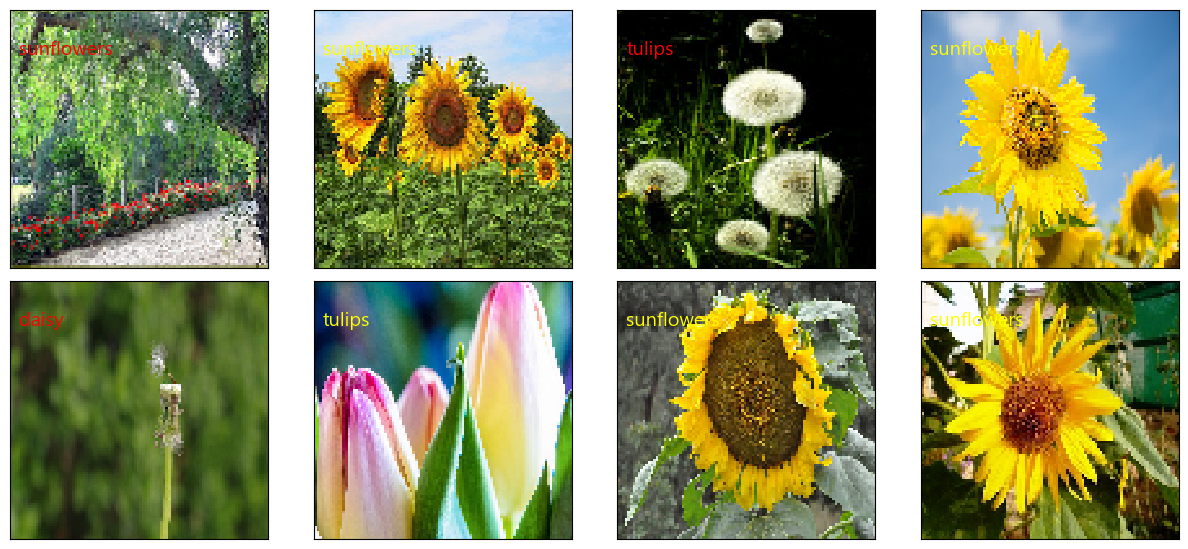

In [55]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)


fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(3, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)


<Figure size 640x480 with 0 Axes>

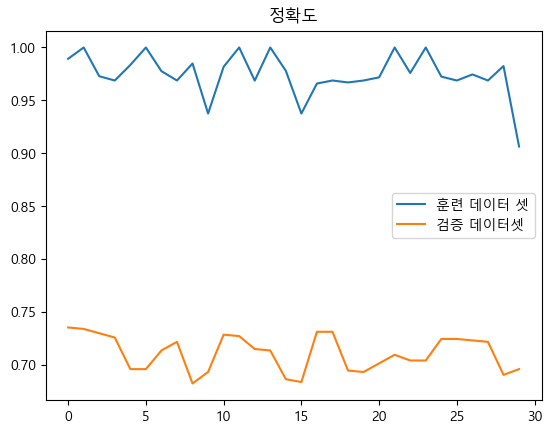

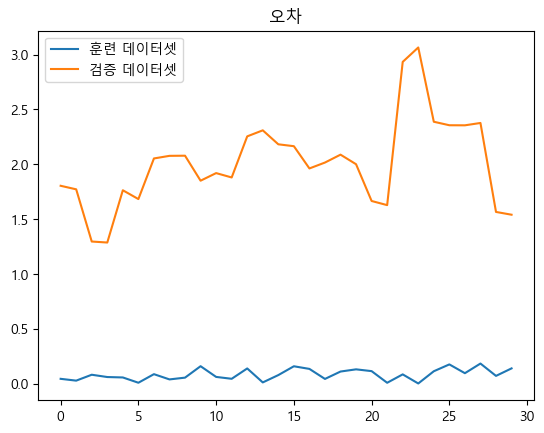

<Figure size 640x480 with 0 Axes>

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 주피터 노트북에서 한글이 깨지니까 폰트를 불러옴
font_fname = 'c:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family  # plt에 폰트 설정

# 모델 정확도 그래프 그리기
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label = "훈련 데이터 셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')
plt.figure()

# 최적화를 진행하지 않은 테스트
- 훈련용 이미지 2934개, 검증용 이미지 736개
- 현재는 훈련데이터와 검증데이터의 정확도 차이가 많이 난다.
- 에포크 수를 30번과 50번을 수행해 봤지만. 결과적으로 차이는 변하지않는다.
- 훈련데이터는 30번째 가까워질수록 정확도가 떨어지고있고 오차률은 처음보다 약간 올라가는것을 볼 수 있다.  하지만 검증데이터보다는 성능이 많은 차이가 보여 과적합을 의심해 볼 수 있다.
- 검증데이터는 정확도가 점점 상향되는 추세가 아니라 첫번째 에포크 정확도와 50번째 에포크 정확도와 오차가 거의 비슷한 걸로 봐선 에포크를 많이 올린다고 정확도가 좋아지지 않는다.
- 현재 그래프로 봐서는 훈련데이터와 검증데이터가 차이가 있고 그러므로 학습할수있는 데이터 양을 늘려서 최적화를 하여 성능을 테스트해봐야 한다.



In [7]:
# 모델생성
model1 = AlexNet((100,100,3), num_class)
model1.summary()

Model: "alex_net_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 23, 23, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │     6,295,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,368,565 (119.66 MB)

 Trainable params: 31,368,565 (119.66 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
EPOCHS = 30
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = './flower_photos/train/'
valid_dir = './flower_photos/val/'

# 훈련 이미지!
train1 = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator1 = train1.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = "categorical"
)

# 검증 이미지!
valid1 = ImageDataGenerator(rescale=1.0/255.0)
valid_generator1 = valid1.flow_from_directory(
    valid_dir,
    target_size = (image_height, image_width),
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    seed = 7,
    shuffle = True,
    class_mode = "categorical"
)

train_num1 = train_generator1.samples
valid_num1 = valid_generator1.samples


Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


In [11]:
# 모델 훈련
history1 = model1.fit(train_generator1,
          epochs=EPOCHS,
          steps_per_epoch=train_num1 // BATCH_SIZE,
          validation_data=valid_generator1,
          validation_steps=valid_num1 // BATCH_SIZE,
          verbose=1)

d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.2378 - loss: 4.7254 - val_accuracy: 0.2609 - val_loss: 1.5421
Epoch 2/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - accuracy: 0.2500 - loss: 1.5554

d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2500 - loss: 1.5554 - val_accuracy: 0.3342 - val_loss: 1.5179
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step - accuracy: 0.3347 - loss: 1.4824 - val_accuracy: 0.3505 - val_loss: 1.4030
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1562 - loss: 1.4760 - val_accuracy: 0.3166 - val_loss: 1.4367
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 292ms/step - accuracy: 0.3283 - loss: 1.3989 - val_accuracy: 0.4769 - val_loss: 1.1553
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5312 - loss: 1.0556 - val_accuracy: 0.4701 - val_loss: 1.1811
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step - accuracy: 0.4652 - loss: 1.2018 - val_accuracy: 0.5054 - val_loss: 1.1267
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3750 - loss: 1.3761 - val_accuracy: 0.5054 - val_loss: 1.1394
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 26s 288ms/step - accuracy: 0.4925 - loss: 1.1585 - val_accuracy: 0.5014 - val_

<Figure size 640x480 with 0 Axes>

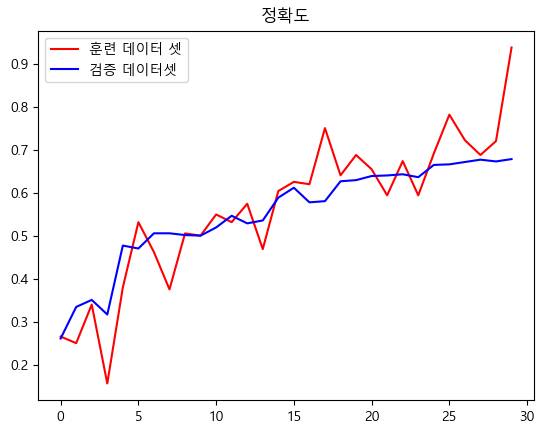

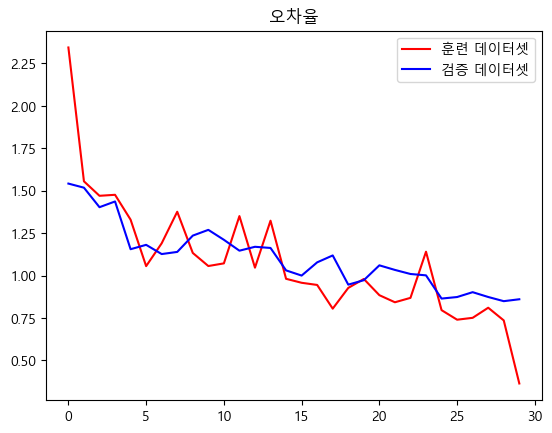

<Figure size 640x480 with 0 Axes>

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 주피터 노트북에서 한글이 깨지니까 폰트를 불러옴
font_fname = 'c:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family  # plt에 폰트 설정

# 모델 정확도 그래프 그리기
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, color= 'red', label = "훈련 데이터 셋")
plt.plot(epochs, val_accuracy, color= 'blue', label = "검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, color= 'red', label ="훈련 데이터셋")
plt.plot(epochs, val_loss, color= 'blue', label ="검증 데이터셋")
plt.legend()
plt.title('오차율')
plt.figure()

# 성능 최적화를 위해 데이터 양을 늘리기

- ImageDataGenerator를 통해서 rotation_range(회전), width_shift_range(상하),height_shift_range(좌우), shear_range(전단=라디안), zoom_range(확대) 속성을 추가하여 데이터 양을 늘리고 테스트를 진행하였다.
-> 상하좌우는 잘못쓴것이 아니다. width를 쓸경우 상하가 움직이고, height는 좌우가 움직인다.
- 결과적으로는 훈련데이터 성능이 더 좋다는 것을 알 수 있고 검증데이터는 에포크수가 늘어남에 따라 성능이 좋아지고 있지만 결코 좋은 성능이라고는 할 수 없다.
- 하지만 알 수 있는 것은 훈련데이터와 추세를 비교했을 때 비슷하게 나아가는 것으로 보아 과적합을 의심이 들지는 않고 에포크 수를 늘려 훈련한다면 점점 좋아질것이라고 생각된다.
 

In [24]:
num_class = 5
class AlexNet1(Sequential):
    def __init__(self, input_shape, num_class):
        super().__init__()
        
        self.add(Input(input_shape))
        self.add(Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        self.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))        
        self.add(Dense(4096, activation='relu'))        
        self.add(Dense(1000, activation='relu'))
        self.add(Dropout(0.4))
        self.add(Dense(num_class, activation='softmax'))
        
        self.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

In [25]:
# 모델생성
model2 = AlexNet1((100,100,3), num_class)
model2.summary()

Model: "alex_net1_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 23, 23, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 11, 11, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 5, 5, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4096)           │     6,295,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,368,565 (119.66 MB)

 Trainable params: 31,368,565 (119.66 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
EPOCHS = 30
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = './flower_photos/train/'
valid_dir = './flower_photos/val/'

# 훈련 이미지!
train2 = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator2 = train2.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = "categorical"
)

# 검증 이미지!
valid2 = ImageDataGenerator(rescale=1.0/255.0)
valid_generator2 = valid2.flow_from_directory(
    valid_dir,
    target_size = (image_height, image_width),
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    seed = 7,
    shuffle = True,
    class_mode = "categorical"
)

train_num2 = train_generator2.samples
valid_num2 = valid_generator2.samples


Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


In [ ]:
# 규제화가 적용된 모델 훈련
history2 = model2.fit(train_generator2,
        epochs=EPOCHS,
        steps_per_epoch=train_num2 // BATCH_SIZE,
        validation_data=valid_generator2,
        validation_steps=valid_num2 // BATCH_SIZE,
        verbose=1)

Epoch 1/30


d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 296ms/step - accuracy: 0.2421 - loss: 4.3652 - val_accuracy: 0.3573 - val_loss: 1.4529
Epoch 2/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 23s 260ms/step - accuracy: 0.2500 - loss: 1.5084

d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2500 - loss: 1.5084 - val_accuracy: 0.3641 - val_loss: 1.4502
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/step - accuracy: 0.3511 - loss: 1.4275 - val_accuracy: 0.4226 - val_loss: 1.3097
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4375 - loss: 1.1516 - val_accuracy: 0.4321 - val_loss: 1.3907
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/step - accuracy: 0.4570 - loss: 1.2280 - val_accuracy: 0.5204 - val_loss: 1.1514
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5625 - loss: 1.1544 - val_accuracy: 0.4565 - val_loss: 1.5069
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step - accuracy: 0.5002 - loss: 1.2215 - val_accuracy: 0.4851 - val_loss: 1.1588
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5625 - loss: 1.1346 - val_accuracy: 0.4755 - val_loss: 1.1552
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 26s 289ms/step - accuracy: 0.5347 - loss: 1.1051 - val_accuracy: 0.5435 - val_

<Figure size 640x480 with 0 Axes>

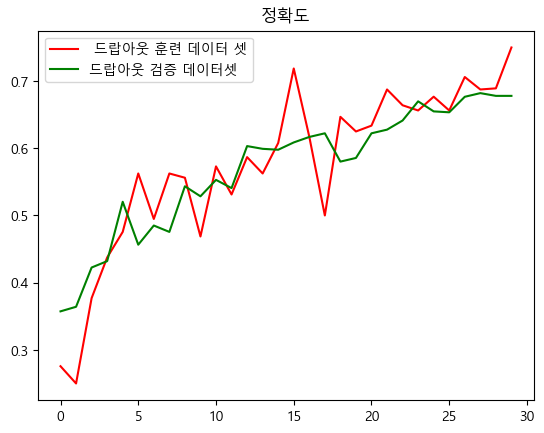

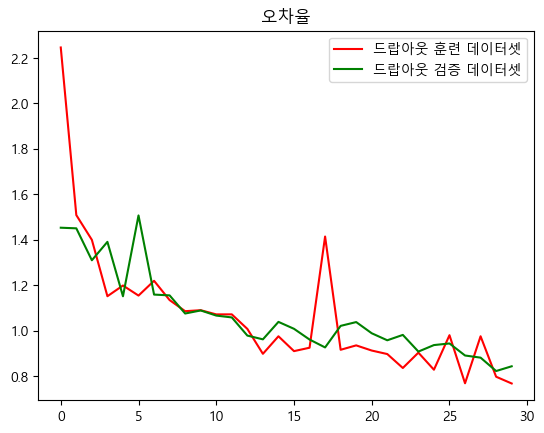

<Figure size 640x480 with 0 Axes>

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 주피터 노트북에서 한글이 깨지니까 폰트를 불러옴
font_fname = 'c:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family  # plt에 폰트 설정

# 모델 정확도 그래프 그리기
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, color= 'red', label = " 드랍아웃 훈련 데이터 셋")
plt.plot(epochs, val_accuracy, color= 'green', label = "드랍아웃 검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, color= 'red', label ="드랍아웃 훈련 데이터셋")
plt.plot(epochs, val_loss, color= 'green', label ="드랍아웃 검증 데이터셋")
plt.legend()
plt.title('오차율')
plt.figure()


# Dropout (규제화) 를 적용한 데이터

- 규제화를 이용하여 모델을 새로 정의하여 테스트를 진행하였다.
- 규제화를 적용한 모델은 결과적으로 한눈에 훈련데이터와 검증데이터가 추세가 비슷하다는것을 볼 수 있다.
- 약간 훈련데이터가 정확도와 오차율이 더 좋은것은 맞지만 반복횟수를 늘리게 된다면 학습효과가 좋아질 것을 기대해 볼 수 있을 것 같다. 

In [39]:
# 조기종료가 추가된 모델 

import os
checkpoint_path = "training_flower/cp.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_path)
print(checkpoint_dir)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

training_flower/cp.keras
training_flower


In [40]:
# 콜백 함수

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    verbose= 1,
    monitor='val_accuracy',
    mode = 'max',
    save_best_only=True
)

In [35]:
num_class = 5
class AlexNet2(Sequential):
    def __init__(self, input_shape, num_class):
        super().__init__()
        
        self.add(Input(input_shape))
        self.add(Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        self.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))        
        self.add(Dense(4096, activation='relu'))        
        self.add(Dropout(0.5))
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_class, activation='softmax'))
        
        self.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

In [37]:
# 모델생성
model3 = AlexNet2((100,100,3), num_class)
model3.summary()

Model: "alex_net2_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 23, 23, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 11, 11, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 5, 5, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 4096)           │     6,295,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,368,565 (119.66 MB)

 Trainable params: 31,368,565 (119.66 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
EPOCHS = 30
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = './flower_photos/train/'
valid_dir = './flower_photos/val/'

# 훈련 이미지!
train3 = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator3 = train3.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = "categorical"
)

# 검증 이미지!
valid3 = ImageDataGenerator(rescale=1.0/255.0)
valid_generator3 = valid3.flow_from_directory(
    valid_dir,
    target_size = (image_height, image_width),
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    seed = 7,
    shuffle = True,
    class_mode = "categorical"
)

train_num3 = train_generator3.samples
valid_num3 = valid_generator3.samples


Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


In [46]:
# 규제화가 적용된 모델 훈련
keras_callback = [
    EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0002),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

history3 = model3.fit(train_generator2,
          epochs=EPOCHS,
          steps_per_epoch=train_num3 // BATCH_SIZE,
          validation_data=valid_generator3,
          validation_steps=valid_num3 // BATCH_SIZE,
          callbacks=keras_callback,
          verbose=1)

Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 47s 513ms/step - accuracy: 0.7467 - loss: 0.6936 - val_accuracy: 0.6617 - val_loss: 0.8984
Epoch 2/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.7500 - loss: 0.6074

d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7500 - loss: 0.6074 - val_accuracy: 0.6454 - val_loss: 0.9712
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 319ms/step - accuracy: 0.7360 - loss: 0.7030 - val_accuracy: 0.7079 - val_loss: 0.7791
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7500 - loss: 0.5710 - val_accuracy: 0.7038 - val_loss: 0.7646
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - accuracy: 0.7628 - loss: 0.6568 - val_accuracy: 0.6943 - val_loss: 0.8120
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7188 - loss: 0.6976 - val_accuracy: 0.7038 - val_loss: 0.7964
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 294ms/step - accuracy: 0.7357 - loss: 0.7374 - val_accuracy: 0.7052 - val_loss: 0.8367
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7188 - loss: 0.7449 - val_accuracy: 0.7120 - val_loss: 0.8291
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 295ms/step - accuracy: 0.7716 - loss: 0.6208 - val_accuracy: 0.6739 - val_

<Figure size 640x480 with 0 Axes>

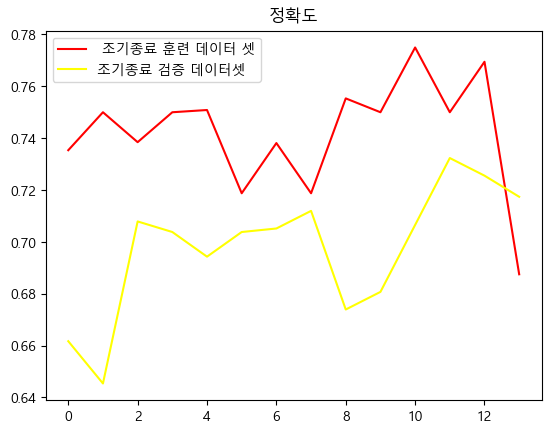

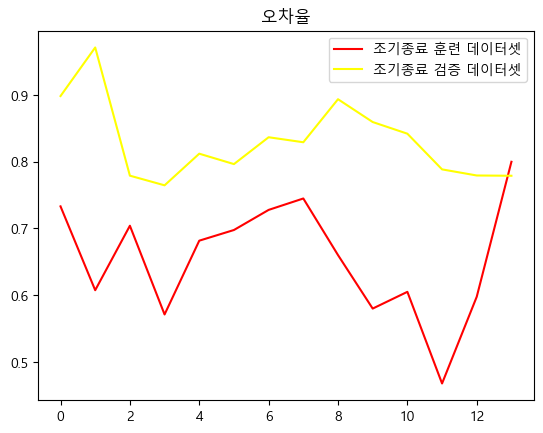

<Figure size 640x480 with 0 Axes>

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 주피터 노트북에서 한글이 깨지니까 폰트를 불러옴
font_fname = 'c:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family  # plt에 폰트 설정

# 모델 정확도 그래프 그리기
accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, color= 'red', label = " 조기종료 훈련 데이터 셋")
plt.plot(epochs, val_accuracy, color= 'yellow', label = "조기종료 검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, color= 'red', label ="조기종료 훈련 데이터셋")
plt.plot(epochs, val_loss, color= 'yellow', label ="조기종료 검증 데이터셋")
plt.legend()
plt.title('오차율')
plt.figure()


# 조기종료를 적용한 데이터

- 조기 종료를 적용하여 테스트를 진행하였으나. 12번째에서 조기종료가 되었다.
- 그래프를 보면 11번째 에포크에서 오차율이 늘어나고 정확도는 내려가고있어서 조기종료가 되었다.
- 그렇다면 정확도와 오차율이 크게 성능이 좋아지느냐? 아니다.
- 조기 종료는 말 그대로 성능을 좋게 만드는것이 아니라, 반복횟수를 늘린 데이터가 오차율이 클 때
- 조기 종료를 함으로써 더이상 훈련을 진행하지 못하게 하는 것이다. 그래서 규제화를 진행한 데이터와 크게 차이가 나지않는 것을 확인했다.